Pre-Lecture Questions (Remember to include SUMMARY and LINK) 

**Question #1:**

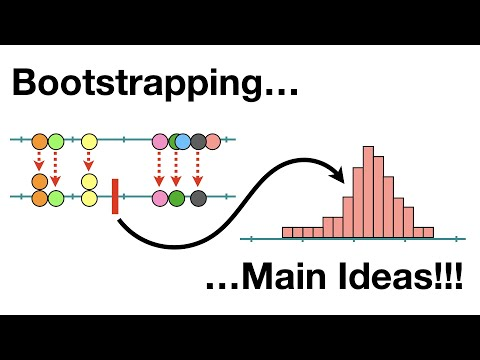

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

The difference between the "standard error of the mean" (SEM) and the "standard deviation" (SD) of the original data is:

SD measures the spread of the original dataset, and can reflect the overall variability of said dataset. The SD of the original dataset remains constant, and depends only on how much variability there is in the actual data points. 

SEM measures the variability of the bootstrapped means, and provides an estimate for how much x-bar varies from miu. SEM provides the uncertainty of the mean estimate of the original data. 

So, to be concise, SD measures the spread/variability of the original data, and SEM measures the accuracy of the mean estimate by providing the variance between x-bar and miu.

**Question #2:**

First, you will need the bootstrapped sample means, following this procedure:

    1. Make a bootstrapped data set by resampling your dataset,allowing for replacement, a bunch of times (n could equal 10000 resamples for accuracy). 
    
    2. Calculate the mean for each resample 
    
    3. Keep track of that resampled mean (like in a historgram, or some kind of data visualization technique) 
   

A formulaic (Z-score method) approach would be to repeat the steps to get the bootstrapped sample means, and then from there:

    1. Calculate the SEM using this formula: 
    
        SEM = (Standard Deviation of Bootstrapped Sample Means)/(n)^1/2, where n is the number of bootstrapped samples. 
        
    2. Use the critical value that corresponds to your distribution type. If it's normal, the critical value is 1.96.
    3. Now, calculate the confidence interval. The formula is:
    
        CI = |Bootstrapped mean - (1.96 x SEM), Bootstrapped Mean + (1.96 x SEM)|
        


**Question #3**

After obtaining the bootstrapped sample means using the steps above...

... You can just use the bootstrapped mean histogram to obtain the percentiles of the distribution and find the CI:

    1. Ensure the resampled means are organized in ascending order.
    
    2. Find the values at the 2.5th and 97.5th percentiles of the bootstrapped mean distribution.
    
    3. Now, the 95% confidence interval is the range between the percentile at 2.5% and the percentile at 97.5%

This is a graphical way of obtaining the confidence interval, without needing standard deviation. 

In terms of np.quantile(), this code is a direct method to provide the percentiles needed to compute the confidence intervals. In the case of the 95% Confidence Interval, as stated above, we would need the percentile at 2.5% and the percentile at 97.5%. 


**Question #4**

In [8]:
import numpy as np
import pandas as pd

# Using the Guatamala dataset, load it into code (obtained from lecture)
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/2e9bd5a67e09b14d01f616b00f7f7e0931515d24/data/2020/2020-07-07/coffee_ratings.csv")
df = df.rename(columns={'country_of_origin': 'origin', 'total_cup_points': 'points'})

guatemala_data = pd.DataFrame({
    'population': [12, 15, 14, 16, 13, 12, 15, 17, 18, 12, 13, 14, 15, 16, 17, 18]  # Example data
})

# This is the code that executes the bootstrapping 
def bootstrap_median(data, num_resamples=1000): # Number of bootstrapped simulations = 1000
    boot_medians = []
    for _ in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True) # Resampling the data
        boot_medians.append(np.median(resample)) # Calculating resampled median 
    return np.array(boot_medians)

# Call the bootstrap function to bootstrap it for Guatemala sample data 
boot_medians = bootstrap_median(guatemala_data['population'], num_resamples=1000)


lower_bound = np.quantile(boot_medians, 0.025)  # Calculate 2.5th percentile 
upper_bound = np.quantile(boot_medians, 0.975)  # ...And 97.5th percentile, both of which are required to get the confidence interval

# Now, we can print the 95% Confidence Interval for the resampled medians obtained via bootstrapping of the Guatemala data set.
print(f"95% Bootstrapped Confidence Interval for the Median: ({lower_bound}, {upper_bound})")


95% Bootstrapped Confidence Interval for the Median: (13.0, 16.0)


Post-Lecture Questions (Remember to post SUMMARY and LINK)

**Question #5**

The reason is because the population parameter (such as mu) is a theorhetical concept: it is impossible to gather data from an entire population. As a result, we rely on samples, (such as x-bar), which are smaller, but representative, subsets of the population. These samples are what we use to draw conclusions on the population via sample statistics (sample mean or x-bar is an example). 
In terms of confidence intervals, these rely on sample statistics to provide estimates for the population parameter, which is unknown. The confidence intervals quantify the uncertainty that is present in statistical inference. 

**Question #6**

        1. What is the process of bootstrapping?
        
In order to understand bootstrapping, some background knowledge has to be established.
For example, when dealing with creating statistics for a population, it is impossible to gather data for the entire population. As a result, statisticians use a sample of the population to represent the entire population, and from there, create statistics (like mean, median, mode, etc) to draw conclusions about the entire population. 

In shorter words, statisticians sample the population. With bootstrapping, in order to avoid repeating an experiment over and over (and using a lot of resources like time and money, which are finite), you can estimate how some statistic (let's use mean) might change if we repeat the experiment a bunch of times. 

So, bootstrapping can be thought of sampling the sample population for any chosen statistic. 

The process of bootstrapping consists of four steps: 
1. Make a bootstrapped dataset, which is the dataset created by sampling the sampled population. What is important to note is the bootstrapped dataset has the same number of values as the original dataset, but can sample the same value more than once. This is called sampling with replacement. 

2. Calculate some statistic (like mean). 

3. Keep track of the mean in a histogram (bar-graph), 

4. And then repeat steps 1-3 a whole lot of times. 
        
        2. What is the main purpose of bootstrapping? 
        
A financial purpose of bootstrapping is to avoid redoing an experiment and spending more money and resources by determining whether or not the next n-number of simulations would result in a similar result. 

A statistical purpose of bootstrapping is to understand how much the statistic varies from the true population statistic (which, because the entire population can't be surveyed, is unknown). This is considered the standard error, and can help us be more precise in our statistics. 

        3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample size of n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
        
I would sample the sample size of n from the population, and calculate the mean for each sample, and attribute that mean to a histogram. Afterwards, I would calculate the standard deviation of the histogram of bootstrapped means, and see how much my hypothesis differed from reality. If it didn't differ by much, my guess was plausible. If it did differ by a lot (large margin of error), then my guess was implausible. 

**Question 7:**

Because, as stated in the homework, the null hypothesis is used by statisticians in statistical hypothesis testing: We assume it is true unless proven otherwise. Since the confidence interval included 0 as a plausible value for the population parameter, we can't discount the fact that the population parameter **could** equal 0, and thus cannot reject the null hypothesis. The sample data did not the evidence necessary to prove otherwise. 

What would lead to the opposite conclusion is if the confidence interval did **not** overlap with 0. As a result, 0 **cannot be a plausible value** for the population parameter, and the sample data provided enough data to prove that to be true. Therefore, the null hypothesis can be rejected in this case. As defined in the homework, this is defined as the alternative hypothesis, where the population mean is not 0. 

**Question 8:**

**Problem Introduction**

The problem tasked for me to solve is to determine whether or not the vaccine created by AliTech improves the health of people who take it or not based on the data provided by the company. 

The Null Hypothesis of "no effect" will be assumed until proven otherwise. In this context, this means that I will assume the drug has no effect (μ = 0) on the people who took it unless the sample data proves I can reject this hypothesis. 

**Provided AliTech Data Visualized**

In [9]:
import pandas as pd 

data = {'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
        'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
        'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
        'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84],}

df = pd.DataFrame(data)

#Makes data into a .csv file
df.to_csv('AliTechData.csv', index=False)

# For data to print in a nicer and more uniform way
print(df.to_string(index=False))

 PatientID  Age Gender  InitialHealthScore  FinalHealthScore
         1   45      M                  84                86
         2   34      F                  78                86
         3   29      M                  83                80
         4   52      F                  81                86
         5   37      M                  81                84
         6   41      F                  80                86
         7   33      M                  79                86
         8   48      F                  85                82
         9   26      M                  76                83
        10   39      F                  83                84


**Comparing the Means from the Data of Initial Health Score vs. Final Health Score**

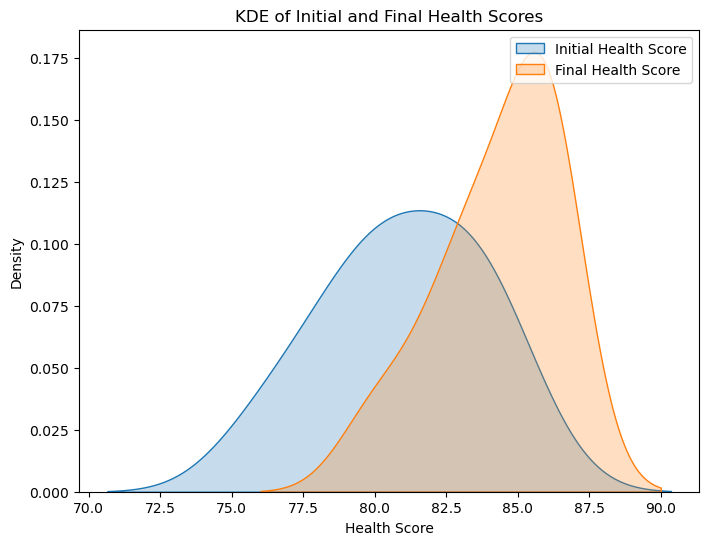

In [10]:
# Comparing the Initial Health Score vs. Final Health Score
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

data = {'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
        'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
        'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
        'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84],}

df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot KDE for InitialHealthScore and FinalHealthScore
sns.kdeplot(df['InitialHealthScore'], label='Initial Health Score', fill=True)
sns.kdeplot(df['FinalHealthScore'], label='Final Health Score', fill=True)

# Add labels and title
plt.title('KDE of Initial and Final Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()
#Makes data into a .csv file
df.to_csv('AliTechData.csv', index=False)

This KDE shows that the mean health score number for the Initial Health Score was aroud 80, meaning that most of the patients had this score. 
After the vaccine, most of the patients had a mean health score of roughly 86.25 (or 86 if rounded to nearest integer). The Final Health Score curve is also shifted to the right, indicating that there was a general positive increase in the health scores after the vaccine. 

This is from the data itself, and now we move onto bootstrapping the data. 

**Bootstrapping the Data to create a Histogram of Bootstrapped Means**

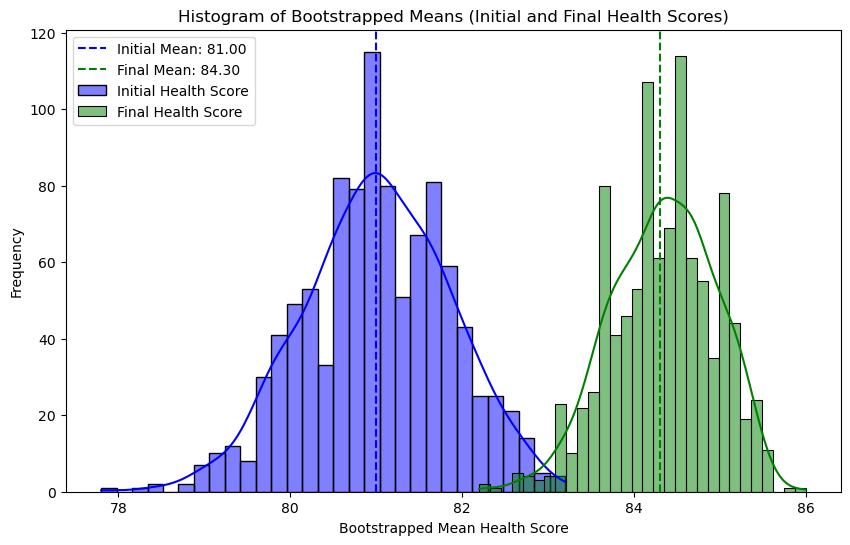

Standard Deviation of Bootstrapped Means for Initial Health Score: 0.85
Standard Deviation of Bootstrapped Means for Final Health Score: 0.61


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# AliTech Dataset 
data = {'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
        'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
        'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
        'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]}

df = pd.DataFrame(data)

# Number of times we are bootstrapping the samples
n_bootstraps = 1000

# Storing the bootstrapped means
bootstrapped_means_initial = []
bootstrapped_means_final = []

# Bootstraping
for _ in range(n_bootstraps):
    # Sampling the data, allowing for replacement 
    bootstrapped_sample = df.sample(frac=1, replace=True)
    
    # Compute the means for both Initial and Final Health Scores
    mean_initial = bootstrapped_sample['InitialHealthScore'].mean()
    mean_final = bootstrapped_sample['FinalHealthScore'].mean()
    
    # Append the means to the lists
    bootstrapped_means_initial.append(mean_initial)
    bootstrapped_means_final.append(mean_final)

# Calculate the original means for Initial and Final Health Scores
original_mean_initial = df['InitialHealthScore'].mean()
original_mean_final = df['FinalHealthScore'].mean()

# Create a histogram of the bootstrapped means
plt.figure(figsize=(10, 6))

# Plotting the KDE histogram for Initial Health Scores
sns.histplot(bootstrapped_means_initial, kde=True, color='blue', label='Initial Health Score', bins=30)

# Plotting the KDE histogram for Final Health Scores
sns.histplot(bootstrapped_means_final, kde=True, color='green', label='Final Health Score', bins=30)

# Add vertical lines for the original means
plt.axvline(original_mean_initial, color='blue', linestyle='--', label=f'Initial Mean: {original_mean_initial:.2f}')
plt.axvline(original_mean_final, color='green', linestyle='--', label=f'Final Mean: {original_mean_final:.2f}')

# Add labels and title
plt.title('Histogram of Bootstrapped Means (Initial and Final Health Scores)')
plt.xlabel('Bootstrapped Mean Health Score')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

std_dev_initial = np.std(bootstrapped_means_initial)
std_dev_final = np.std(bootstrapped_means_final)

print(f'Standard Deviation of Bootstrapped Means for Initial Health Score: {std_dev_initial:.2f}')
print(f'Standard Deviation of Bootstrapped Means for Final Health Score: {std_dev_final:.2f}')
  


After bootstrapping 1000 times, the initial health score mean and final health score mean are 81 and 84.3, respectively. In addition, the Final Health Score curve still shifted towards the right, and the mean increased by 3.3. 

The 95% confidence interval of the initial health score is: (calculate tomorrow)
The 95% confidence interval of the final health score is: (calculate tomorrw)

FORMULA: CI = |Bootstrapped mean - (1.96 x SEM), Bootstrapped Mean + (1.96 x SEM)|
        

**Conclusion**

I calculated the 95% confidence interval to be between (79.334, 85.515), by using the formula CI = |Bootstrapped Mean +/- (1.96)(SD)|, where SD = 0.85 for initial health score and 0.62 for final health score. 
This means that mu **probably** lies between this interval, which **does not** include 0. As a result, this proves the alternative hypothesis, and provides enough evidence for me to reject the Null Hypothesis. 

Since the no-effect assumption is disproven, the only other conclusion is that it negatively or positively impacted the health of the patients. Based on the right-ward shift of the graph, in addition to the average increase of health from 81 to 84.3, meaning that most who took it had a score that fell around that final score, I can conclude that the effect of the drug was positive. According to the statistical data, yes, the the drug did improve the health of those who took it.

The AliTech vaccine has proven to be beneficial based on the provided data. 

Some further considerations to note are, is this sample size of patients large enough to represent a large-scale implementation of the vaccine? Personally, I believe naught, since 10 people cannot possibly be a sample large enough to represent maybe millions of people who might take it. As a result, I would not implement the vaccine until we have stronger data. 


Another question is, which age group is best suited for this vaccine? Does it improve a younger person's health at a greater rate than an older person? Or vice versa? The audience for this vaccine should be tested with a broader range of ages. 


**Question #9:** Yes 

**Pre-Lecture ChatGPT Session Link:** https://chatgpt.com/share/66fb6093-e124-8003-9a7d-c3fe64f0740d

**Pre-Lecture ChatGPT Session Summary:**

Here's a summary of what we've discussed today for your statistics homework:

Standard Error of the Mean (SEM) vs. Standard Deviation (SD):

Standard Deviation (SD) measures the variability or spread of the original dataset.

Standard Error of the Mean (SEM) measures how much the sample mean varies from sample to sample, reflecting the uncertainty in estimating the population mean.

In bootstrapping, the SD refers to the spread of the original data, while the SEM reflects the variability of the bootstrapped sample means.

95% Confidence Interval Using SEM:

To calculate a 95% confidence interval using SEM, you can use the formula:

CI=[Bootstrapped Mean±1.96×SEM]

Alternatively, using the percentile method, you can take the 2.5th and 97.5th percentiles from the bootstrapped sample means to find the confidence interval:


CI=[Percentile at 2.5%,Percentile at 97.5%]

Using np.quantile(...) for Bootstrapping:

The np.quantile(...) function is used to calculate specific percentiles from a distribution, such as the 2.5th and 97.5th percentiles from bootstrapped sample means. This gives you a 95% confidence interval.

Code for Bootstrapping the Median and Calculating a 95% Confidence Interval:

We discussed a Python implementation where you:
Perform bootstrapping by resampling a dataset and calculating the median for each resample.

Use np.quantile(...) to find the 95% confidence interval by getting the 2.5th and 97.5th percentiles from the array of bootstrapped medians.

Let me know if you need any further clarification or adjustments!











**Post-Lecture ChatGPT Session Link:** https://chatgpt.com/share/66fed959-6c18-8003-8949-e59f006b15e6

**Post-Lecture ChatGPT Session Summary:**

        1. Creating CSV Files and Printing Data Nicely:
- You shared a dataset with patient information and health scores, and we used pandas to create a CSV file from the data.

- To print the data in a neat, more readable format, we used df.to_string(index=False) to display the DataFrame without the index, ensuring uniform column alignment.

        2. Bootstrapping the Data:        
- You requested a procedure to bootstrap the data 1000 times to compute the bootstrapped means for both InitialHealthScore and FinalHealthScore.

- After resampling and calculating means for each iteration, we created a histogram of the bootstrapped means.

        3. Adding Mean Lines to Plots:
        
- We enhanced the histogram by adding vertical lines to indicate the original mean of both health scores, using plt.axvline() for clearer comparisons.

- This helped visually show how the bootstrapped distributions compared to the actual mean values.

        4. KDE Plot and Interpretation of Density:
        
- We plotted a Kernel Density Estimate (KDE) to visualize the probability density of the bootstrapped means.

- You asked about the y-axis ("Density"). I explained that density in this context represents the likelihood of the data falling within a given range, scaled so that the area under the curve sums to 1.

        5. Standard Deviation of Bootstrapped Means:
        
- We calculated the standard deviation of the bootstrapped means for both health scores. This provides a measure of variability, indicating how much the bootstrapped means deviate from their average.

- A smaller standard deviation suggests more stability in the estimate of the mean, while a larger one implies more uncertainty.

        6. Bootstrapped Means:
        
- We found the bootstrapped means for both:
    - Initial Health Score: 81.06
    
    - Final Health Score: 84.27
    
        7. Confidence Interval Interpretation:
        
- You asked about interpreting a confidence interval, such as (79.334, 85.5152).

- I explained that this interval suggests we are confident (e.g., 95%) that the true population mean lies within this range. The confidence interval provides an estimate of the mean, considering variability in the data.

        8. Key Insights:
        
- Bootstrapping is an effective way to estimate population parameters and assess variability when sample sizes are limited.

- Visualizing bootstrapped means with histograms and KDE plots helps assess the distribution and variability in the data.

- Confidence intervals and standard deviations of bootstrapped means are useful in understanding the precision and reliability of your estimates.


Let me know if you'd like to dive deeper into any of these topics!